In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('churn.txt')

In [3]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [5]:
df.dtypes.value_counts()

float64    8
int64      8
object     5
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [7]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Account_Length
False    3333
Name: Account_Length, dtype: int64

Vmail_Message
False    3333
Name: Vmail_Message, dtype: int64

Day_Mins
False    3333
Name: Day_Mins, dtype: int64

Eve_Mins
False    3333
Name: Eve_Mins, dtype: int64

Night_Mins
False    3333
Name: Night_Mins, dtype: int64

Intl_Mins
False    3333
Name: Intl_Mins, dtype: int64

CustServ_Calls
False    3333
Name: CustServ_Calls, dtype: int64

Churn
False    3333
Name: Churn, dtype: int64

Intl_Plan
False    3333
Name: Intl_Plan, dtype: int64

Vmail_Plan
False    3333
Name: Vmail_Plan, dtype: int64

Day_Calls
False    3333
Name: Day_Calls, dtype: int64

Day_Charge
False    3333
Name: Day_Charge, dtype: int64

Eve_Calls
False    3333
Name: Eve_Calls, dtype: int64

Eve_Charge
False    3333
Name: Eve_Charge, dtype: int64

Night_Calls
False    3333
Name: Night_Calls, dtype: int64

Night_Charge
False    3333
Name: Night_Charge, dtype: int64

Intl_Calls
False    3333
Name: Intl_Calls, dtype: int64

Intl_Charge
False    3333
Nam

In [8]:
import missingno as msno
msno.matrix(df)

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
yn_cols= df[['Churn','Intl_Plan','Vmail_Plan']]

In [10]:
yn_cols.head()

,Churn,Intl_Plan,Vmail_Plan
0,no,no,yes
1,no,no,yes
2,no,no,no
3,no,yes,no
4,no,yes,no


In [11]:
cols = list(yn_cols.columns)
for col in cols:
    print("Column Name: " + col)
    print(df[col].value_counts().head())

Column Name: Churn
no     2850
yes     483
Name: Churn, dtype: int64
Column Name: Intl_Plan
no     3010
yes     323
Name: Intl_Plan, dtype: int64
Column Name: Vmail_Plan
no     2411
yes     922
Name: Vmail_Plan, dtype: int64


## Model outcomes

Two classes:
- **yes**: customer will churn (Churner)
- **no**: customer will not churn (Non-churner)

## Differences between churners and non-churners
- Do churners call customer service more often?
- Does one state have more churners compared to another? 

### Let's group dataframe by 'churn' and compute the mean and std

In [12]:
df.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [13]:
df.groupby(['Churn']).std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


### Let's count the number of churners and non-churners by State

In [14]:
churn_count_by_state = pd.DataFrame(df.groupby('State')['Churn'].value_counts())
churn_percent_by_state = pd.DataFrame(df.groupby('State')['Churn'].value_counts(normalize = True))
churn_state_df = churn_count_by_state.merge(churn_percent_by_state, left_index = True, right_index = True)
churn_state_df.columns = ['Count', 'Percent']
churn_state_df.head(10)

Count   Percent
State Churn                 
AK    no        49  0.942308
      yes        3  0.057692
AL    no        72  0.900000
      yes        8  0.100000
AR    no        44  0.800000
      yes       11  0.200000
AZ    no        60  0.937500
      yes        4  0.062500
CA    no        25  0.735294
      yes        9  0.264706

## Visualization

### Visualizing the distribution of account legnths

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

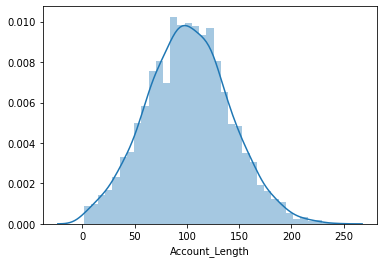

In [16]:
sns.distplot(df['Account_Length'])

### Differences in account lengths

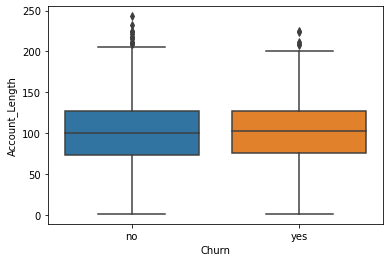

In [17]:
sns.boxplot(x = 'Churn',
            y = 'Account_Length',
            data = df)
plt.show()

### Wants to know if "International Plan" feature has an impact on account lengths or churn

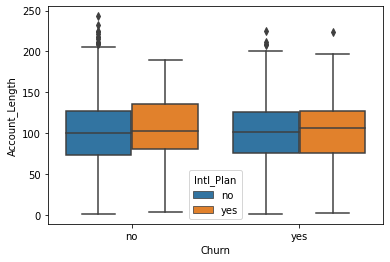

In [18]:
sns.boxplot(x = 'Churn',
            y = 'Account_Length',
            data = df,
            hue = 'Intl_Plan')
plt.show()

### Visualize the distribution of Mins

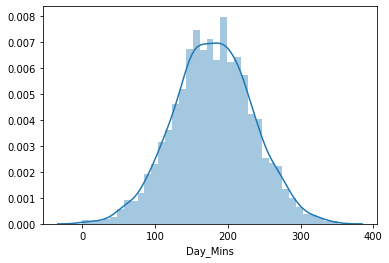

In [19]:
sns.distplot(df['Day_Mins'])
plt.show()

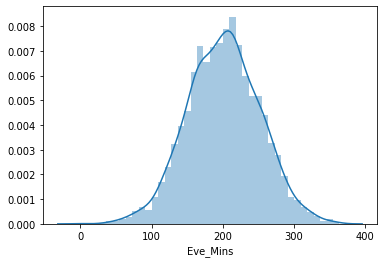

In [20]:
sns.distplot(df['Eve_Mins'])
plt.show()

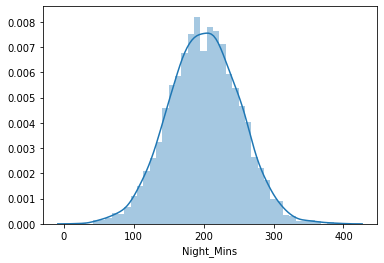

In [21]:
sns.distplot(df['Night_Mins'])
plt.show()

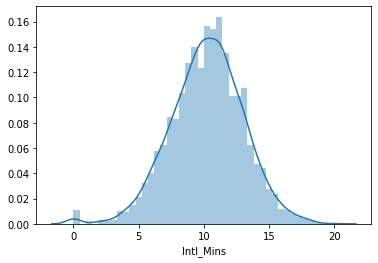

In [22]:
sns.distplot(df['Intl_Mins'])
plt.show()

### Customer service calls and churn
You've already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

Let's now visualize this difference using a box plot and incorporate other features of interest - do customers who have international plans make more customer service calls? Or do they tend to churn more? How about voicemail plans? Let's find out!

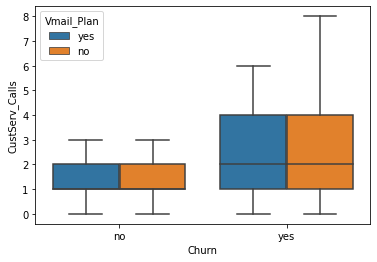

In [23]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym = "",
            hue = "Vmail_Plan")
plt.show()

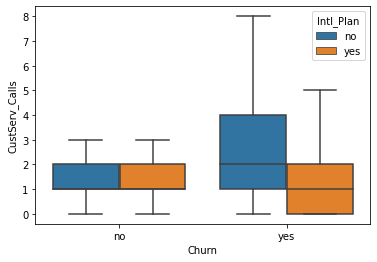

In [24]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym = "",
            hue = "Intl_Plan")
plt.show()

## Data Preprocessing

### Model Assumptions
Some assumptions that models make:
- That the features are normally distributed
- That the feagures are on the same scale

In [25]:
encode_dict = {'yes': 1,'no': 0}
yn_cols= df[['Churn','Intl_Plan','Vmail_Plan']]
yn_cols.replace(encode_dict, inplace=True)
yn_cols.head()

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Churn,Intl_Plan,Vmail_Plan
0,0,0,1
1,0,0,1
2,0,0,0
3,0,1,0
4,0,1,0


In [26]:
yn_cols.dtypes

Churn         int64
Intl_Plan     int64
Vmail_Plan    int64
dtype: object

### One-hot-encoding

In [26]:
df_state = pd.get_dummies(df['State'])

In [27]:
df_state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
preprocessed_df = df.drop(['Churn', 'Intl_Plan', 'Vmail_Plan'], axis = 1)

In [29]:
preprocessed_df = pd.concat([preprocessed_df, yn_cols], axis=1, sort=False)

In [30]:
preprocessed_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,...,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,Churn,Intl_Plan,Vmail_Plan
0,128,25,265.1,197.4,244.7,10.0,1,110,45.07,99,...,91,11.01,3,2.70,KS,415,382-4657,0,0,1
1,107,26,161.6,195.5,254.4,13.7,1,123,27.47,103,...,103,11.45,3,3.70,OH,415,371-7191,0,0,1
2,137,0,243.4,121.2,162.6,12.2,0,114,41.38,110,...,104,7.32,5,3.29,NJ,415,358-1921,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,71,50.90,88,...,89,8.86,7,1.78,OH,408,375-9999,0,1,0
4,75,0,166.7,148.3,186.9,10.1,3,113,28.34,122,...,121,8.41,3,2.73,OK,415,330-6626,0,1,0


In [31]:
new_df = preprocessed_df.copy()

In [32]:
new_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,...,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,Churn,Intl_Plan,Vmail_Plan
0,128,25,265.1,197.4,244.7,10.0,1,110,45.07,99,...,91,11.01,3,2.70,KS,415,382-4657,0,0,1
1,107,26,161.6,195.5,254.4,13.7,1,123,27.47,103,...,103,11.45,3,3.70,OH,415,371-7191,0,0,1
2,137,0,243.4,121.2,162.6,12.2,0,114,41.38,110,...,104,7.32,5,3.29,NJ,415,358-1921,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,71,50.90,88,...,89,8.86,7,1.78,OH,408,375-9999,0,1,0
4,75,0,166.7,148.3,186.9,10.1,3,113,28.34,122,...,121,8.41,3,2.73,OK,415,330-6626,0,1,0


## Feature Selection and Engineering

### Feature Selection

Dropping unnecessary features
- Unique identifiers
    ex) Phone number, Social security numbers, account numbers

Dropping correlated feature
- Features that are highly correlated with other features can also be dropped, as they provide no additional information to the model

In [33]:
df.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094,-0.008264
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674,-0.011886


- As shown above correlation matrix, we see that 'Day_Mins', 'Eve_Mins', 'Night_Mins' are highly correlated with 'Eve_Charge', 'Night_Charge', 'Intl_Charge'. However, intuitively, it makes sense that these feature should be correlated, from a modeling standpoint, we can improve the performance of our models by removing these redundant features. 

In [34]:
new_df = new_df.drop(df[['Area_Code', 'Phone']], axis = 1)
new_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Churn,Intl_Plan,Vmail_Plan
0,128,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,0,0,1
1,107,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,0,0,1
2,137,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78,OH,0,1,0
4,75,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73,OK,0,1,0


### Feature Engineering
- Creating new features to help improve model performance
- Should consult with business and subject matter experts

#### Examples of feature engineering
- Total Minutes: sum of 'Day_Mins', 'Eve_Mins', 'Night_Mins' 
- Ratio between Minutes to Charge

In [35]:
new_df['avg_night_calls'] = new_df['Night_Mins']/new_df['Night_Calls']
new_df['avg_eve_calls'] = new_df['Eve_Mins']/new_df['Eve_Calls']
new_df['avg_day_calls'] = new_df['Day_Mins']/new_df['Day_Calls']
new_df['avg_int_calls'] = new_df['Intl_Mins']/new_df['Intl_Calls']
new_df['Day_Cost'] = new_df['Day_Mins']/new_df['Day_Charge']
new_df['Eve_Cost'] = new_df['Eve_Mins']/new_df['Eve_Charge']
new_df['Night_Cost'] = new_df['Night_Mins']/new_df['Night_Charge']
new_df['Intl_Cost'] = new_df['Intl_Mins']/new_df['Intl_Charge']

In [36]:
new_df = new_df.drop(df[['Night_Mins','Eve_Mins','Day_Mins','Intl_Mins',
                         'Night_Calls','Eve_Calls','Day_Calls','Intl_Calls',
                         'Night_Charge','Eve_Charge','Day_Charge','Intl_Charge']], axis = 1)

In [37]:
new_df.head()

,Account_Length,Vmail_Message,CustServ_Calls,State,Churn,Intl_Plan,Vmail_Plan,avg_night_calls,avg_eve_calls,avg_day_calls,avg_int_calls,Day_Cost,Eve_Cost,Night_Cost,Intl_Cost
0,128,25,1,KS,0,0,1,2.689011,1.993939,2.410000,3.333333,5.881961,11.764005,22.225250,3.703704
1,107,26,1,OH,0,0,1,2.469903,1.898058,1.313821,4.566667,5.882781,11.762936,22.218341,3.702703
2,137,0,0,NJ,0,0,0,1.563462,1.101818,2.135088,2.440000,5.882069,11.766990,22.213115,3.708207
3,84,0,2,OH,0,1,0,2.212360,0.703409,4.216901,0.942857,5.882122,11.768061,22.223476,3.707865
4,75,0,3,OK,0,1,0,1.544628,1.215574,1.475221,3.366667,5.882145,11.760508,22.223543,3.699634


In [38]:
new_df = new_df.drop('State', axis = 1)

In [39]:
new_df.head(2)

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,avg_night_calls,avg_eve_calls,avg_day_calls,avg_int_calls,Day_Cost,Eve_Cost,Night_Cost,Intl_Cost
0,128,25,1,0,0,1,2.689011,1.993939,2.410000,3.333333,5.881961,11.764005,22.225250,3.703704
1,107,26,1,0,0,1,2.469903,1.898058,1.313821,4.566667,5.882781,11.762936,22.218341,3.702703


In [40]:
# new_df = pd.concat([new_df, df_state], axis=1, sort=False)

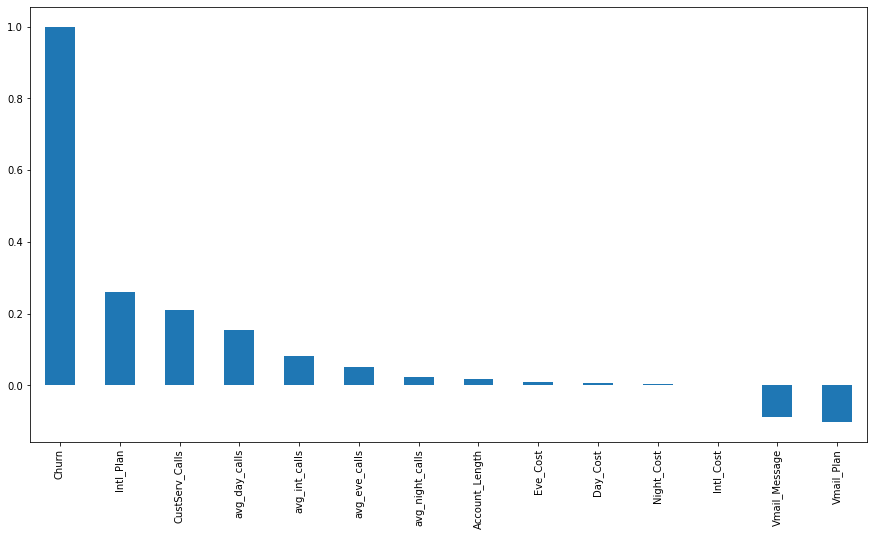

In [41]:
plt.figure(figsize=(15,8))
new_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler
df_scaled = scale().fit_transform(new_df)

In [43]:
df_scaled

array([[ 0.67648946,  1.23488274, -0.42793202, ..., -0.23817387,
         0.39082957,  0.17083345],
       [ 0.14906505,  1.30794844, -0.42793202, ..., -0.71016778,
        -0.45426768, -0.05124786],
       [ 0.9025285 , -0.59175986, -1.1882185 , ...,  1.08057965,
        -1.0934708 ,  1.16986184],
       ...,
       [-1.83505538, -0.59175986,  0.33235445, ..., -0.35183331,
        -1.39517484, -0.47617509],
       [ 2.08295458, -0.59175986,  0.33235445, ..., -1.46028825,
         1.75733202,  0.17083345],
       [-0.67974475,  1.23488274, -1.1882185 , ...,  0.4164307 ,
         0.77137555, -0.05124786]])

In [44]:
new_df.isnull().sum()

Account_Length      0
Vmail_Message       0
CustServ_Calls      0
Churn               0
Intl_Plan           0
Vmail_Plan          0
avg_night_calls     0
avg_eve_calls       1
avg_day_calls       2
avg_int_calls      18
Day_Cost            2
Eve_Cost            1
Night_Cost          0
Intl_Cost          18
dtype: int64

In [45]:
avg_1 = new_df['avg_eve_calls'].astype('float').mean(axis=0)
avg_2 = new_df['avg_day_calls'].astype('float').mean(axis=0)
avg_3 = new_df['avg_int_calls'].astype('float').mean(axis=0)
avg_4 = new_df['Day_Cost'].astype('float').mean(axis=0)
avg_5 = new_df['Eve_Cost'].astype('float').mean(axis=0)
avg_6 = new_df['Intl_Cost'].astype('float').mean(axis=0)

In [46]:
import numpy as np
new_df['avg_eve_calls'].replace(np.nan, avg_1, inplace=True)

In [47]:
new_df['avg_day_calls'].replace(np.nan, avg_2, inplace=True)
new_df['avg_int_calls'].replace(np.nan, avg_3, inplace=True)
new_df['Day_Cost'].replace(np.nan, avg_4, inplace=True)
new_df['Eve_Cost'].replace(np.nan, avg_5, inplace=True)
new_df['Intl_Cost'].replace(np.nan, avg_6, inplace=True)

In [48]:
new_df.isnull().sum()

Account_Length     0
Vmail_Message      0
CustServ_Calls     0
Churn              0
Intl_Plan          0
Vmail_Plan         0
avg_night_calls    0
avg_eve_calls      0
avg_day_calls      0
avg_int_calls      0
Day_Cost           0
Eve_Cost           0
Night_Cost         0
Intl_Cost          0
dtype: int64

## Supervised Learning

In [49]:
X = new_df[['Intl_Plan','CustServ_Calls','avg_day_calls','avg_int_calls',
            'avg_eve_calls','avg_night_calls','Vmail_Message','Vmail_Plan']]
y = new_df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
import numpy as np
clf = LogisticRegression()
clf.fit(X_train, np.ravel(y_train))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = clf.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
print('Mean Absolute Error: '+str(mae))
print('Mean Squared Error: '+str(mse))

Mean Absolute Error: 0.15142428785607195
Mean Squared Error: 0.15142428785607195


In [53]:
pred_churn_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred_churn_df.head()

,Actual,Predicted
438,0,0
2674,0,0
1345,1,0
1957,0,0
2148,0,0


In [54]:
score = clf.score(X_test, y_test)
score

0.848575712143928

In [55]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions))

0.5


### Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier (random_state=1)

In [57]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [58]:
predictions = clf.predict(X_test)
mae = mean_absolute_error(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
print('Mean Absolute Error: '+str(mae))
print('Mean Squared Error: '+str(mse))

Mean Absolute Error: 0.14842578710644677
Mean Squared Error: 0.14842578710644677


In [59]:
pred_churn_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred_churn_df.head(10)

,Actual,Predicted
438,0,0
2674,0,0
1345,1,1
1957,0,1
2148,0,0
3106,0,0
1786,0,0
321,0,0
3082,0,0
2240,0,0


In [60]:
score = clf.score(X_test, y_test)
score

0.8515742128935532

In [61]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions))

0.5102040816326531


### Support Vector Machine

In [67]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
predictions = svc.predict(X_test)
mae = mean_absolute_error(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
print('Mean Absolute Error: '+str(mae))
print('Mean Squared Error: '+str(mse))

Mean Absolute Error: 0.12593703148425786
Mean Squared Error: 0.12593703148425786


In [69]:
score = svc.score(X_test, y_test)
score

0.8740629685157422

In [70]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions))

0.9473684210526315


In [71]:
y_pred_prob = svc.predict_proba(X_test)[:,1]

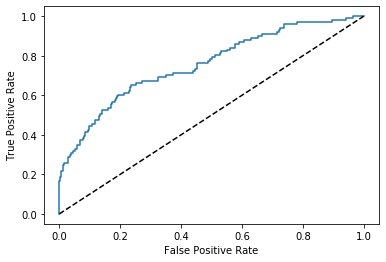

In [72]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [73]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, predictions)
auc

0.5882255186649407

### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [75]:
clf.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
predictions = clf.predict(X_test)
mae = mean_absolute_error(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
print('Mean Absolute Error: '+str(mae))
print('Mean Squared Error: '+str(mse))

Mean Absolute Error: 0.12293853073463268
Mean Squared Error: 0.12293853073463268


In [77]:
clf.score(X_test, y_test)

0.8770614692653673

In [78]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions))

0.6862745098039216


In [79]:
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, predictions))

0.3465346534653465


## Model Metrics

### Imbalanced Classes

In practice, many real world datasets will tend to have imbalanced classes: that is, more data points that belong to one category than another. In this case, we can use techniques such as upsampling and downsampling methods.

In [80]:
new_df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In this imbalanced dataset, accuracy is not a very useful metric. If we were to build a classifier that **always** predicted that a customer would **not** churn, it would be very accurate

## ROC and AUC

In [81]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [82]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

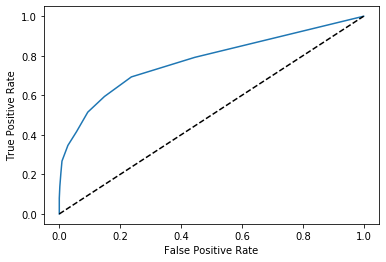

In [83]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, predictions)

In [85]:
auc

0.6591330511142987

- The AUC score about 0.66 indicates that there is 66% chance that model will be able to distinguish between Churner and non-Churner.

### F1 Score

In [86]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions))

0.4605263157894736


- The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes.

## Model Tuning

In [87]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_features': 'log2'}
